In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import Data_clening_functions as clean

pd.set_option("display.max_columns", None)
data_set = pd.read_csv(
    r"/home/ahmed/Ai/Data science and Ml projects/House-Prices-Prediction---Data-Science-Ml-project/original Data sets/train.csv"
)
test_df = pd.read_csv(
    r"/home/ahmed/Ai/Data science and Ml projects/House-Prices-Prediction---Data-Science-Ml-project/original Data sets/test.csv"
)
df = data_set

/tmp/ipykernel_84206/3149795767.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
numerical_features = df[
    [
        "LotArea",
        "OverallQual",
        "YearBuilt",
        "YearRemodAdd",
        "GarageYrBlt",
        "FullBath",
        "TotalBsmtSF",
        "Fireplaces",
        "TotRmsAbvGrd",
        "GrLivArea",
        "GarageArea",
        "GarageCars",
        "SalePrice",
    ]
]

test = test_df[
    [
        "LotArea",
        "OverallQual",
        "YearBuilt",
        "YearRemodAdd",
        "GarageYrBlt",
        "FullBath",
        "TotalBsmtSF",
        "Fireplaces",
        "TotRmsAbvGrd",
        "GrLivArea",
        "GarageArea",
        "GarageCars",
        "SalePrice",
    ]
]

<a id="intro"></a>

<h2>   
      <font color = blue >
            <span style='font-family:Georgia'>
            1. renaming:
            </span>   
        </font>    
</h2>


In [3]:
numerical_features = clean.rename_columns(numerical_features)
test = clean.rename_columns(test)

<a id="intro"></a>

<h2>   
      <font color = blue >
            <span style='font-family:Georgia'>
            2. fill missing values:
            </span>   
        </font>    
</h2>


In [4]:
numerical_features = clean.missing_values(numerical_features)
test = clean.missing_values(test)

<a id="intro"></a>

<h2>   
      <font color = blue >
            <span style='font-family:Georgia'>
            3. Outliers:
            </span>   
        </font>    
</h2>


<h3 name='libraries'>   
      <font color = purple >
            <span style='font-family:Georgia'>
            1.1 SalePrice :
            </span>   
        </font>    
</h3>


527331.9149999974
61815.97


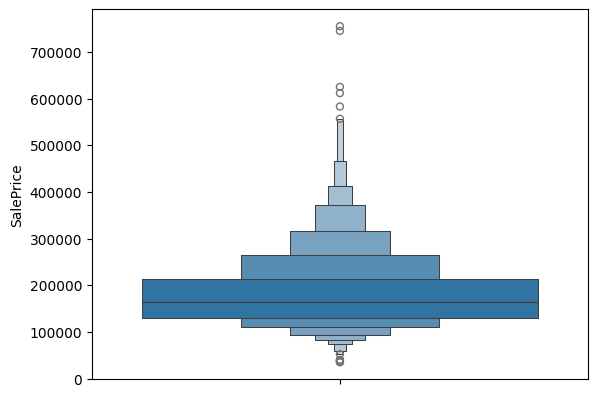

In [5]:
sns.boxenplot(numerical_features["SalePrice"])

print(numerical_features["SalePrice"].quantile(0.995))
print(numerical_features["SalePrice"].quantile(0.01))

In [6]:
Q1 = numerical_features["SalePrice"].quantile(0.01)
Q2 = numerical_features["SalePrice"].quantile(0.995)

df = clean.remove_outliers_quantile(Q1, Q2, "SalePrice", numerical_features)

23


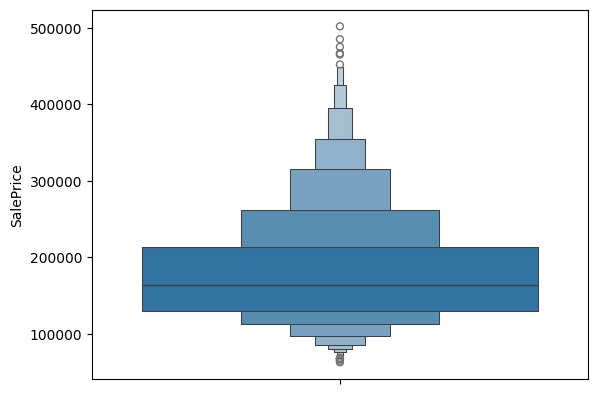

In [7]:
sns.boxenplot(df["SalePrice"])
feature = df

<h3 name='libraries'>   
      <font color = purple >
            <span style='font-family:Georgia'>
            1.2 year_built:
            </span>   
        </font>    
</h3>


2009.0
1908.36


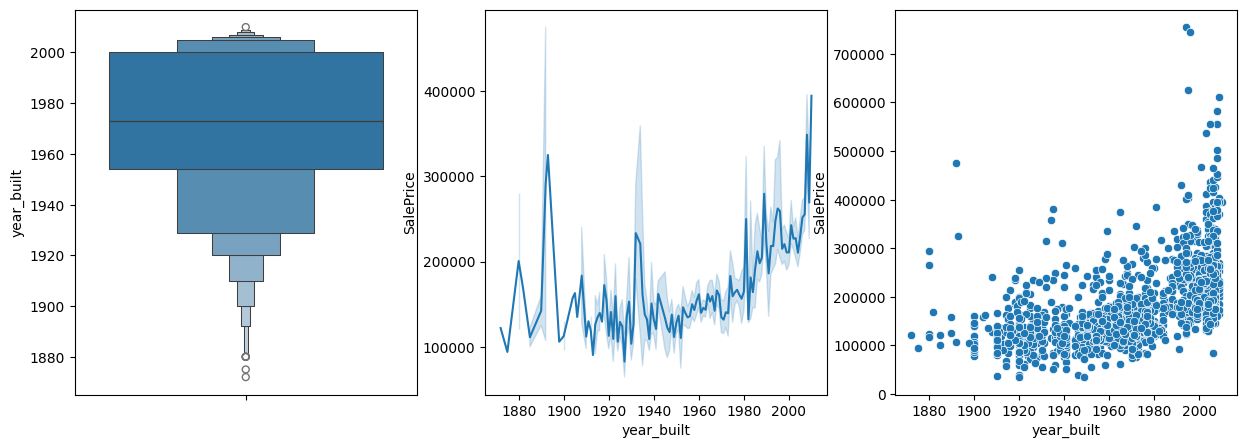

In [8]:
fig, axe = plt.subplots(1, 3, figsize=(15, 5))

sns.boxenplot(numerical_features["year_built"], ax=axe[0])
sns.lineplot(
    x=numerical_features["year_built"], y=numerical_features["SalePrice"], ax=axe[1]
)
sns.scatterplot(
    x=numerical_features["year_built"], y=numerical_features["SalePrice"], ax=axe[2]
)

print(numerical_features["year_built"].quantile(0.999))
print(numerical_features["year_built"].quantile(0.02))

In [9]:
Q1 = numerical_features["year_built"].quantile(0.02)
Q2 = numerical_features["year_built"].quantile(0.999)

df = clean.remove_outliers_quantile(Q1, Q2, "year_built", feature)
numerical_features = df

31


2009.0
1915.0


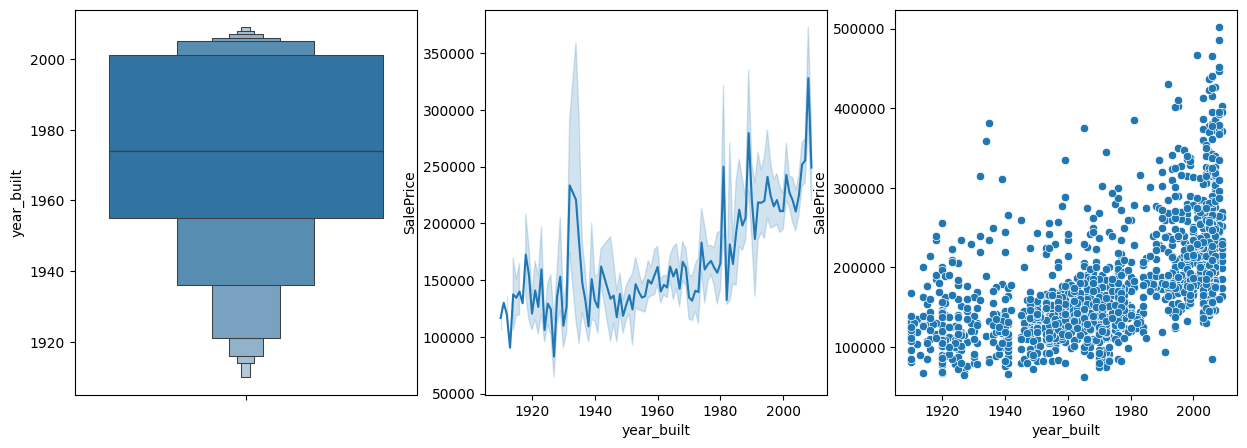

In [10]:
fig, axe = plt.subplots(1, 3, figsize=(15, 5))

sns.boxenplot(numerical_features["year_built"], ax=axe[0])
sns.lineplot(
    x=numerical_features["year_built"], y=numerical_features["SalePrice"], ax=axe[1]
)
sns.scatterplot(
    x=numerical_features["year_built"], y=numerical_features["SalePrice"], ax=axe[2]
)

print(numerical_features["year_built"].quantile(0.999))
print(numerical_features["year_built"].quantile(0.02))

<h3 name='libraries'>   
      <font color = purple >
            <span style='font-family:Georgia'>
            1.3 year_remodel_add:
            </span>   
        </font>    
</h3>


2010.0
1950.0


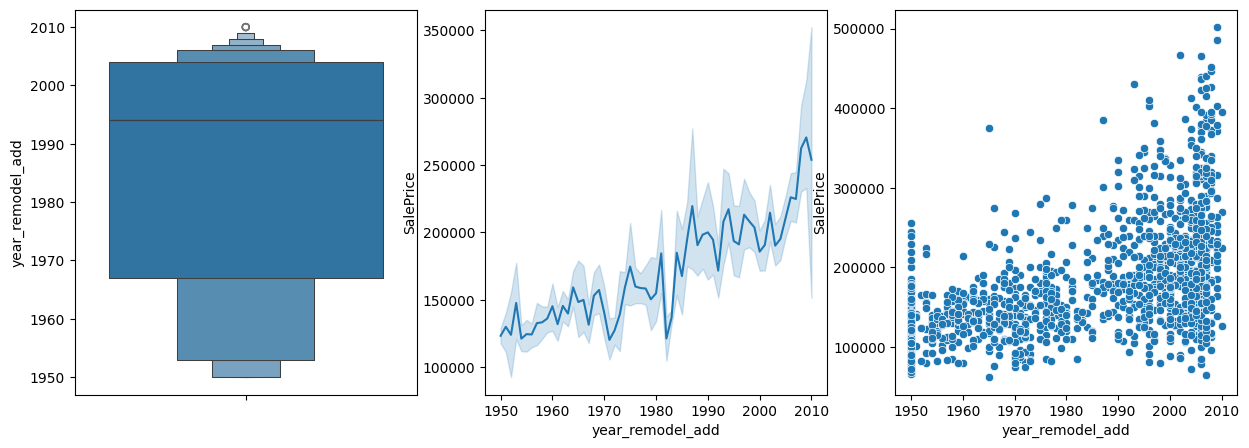

In [11]:
fig, axe = plt.subplots(1, 3, figsize=(15, 5))

sns.boxenplot(numerical_features["year_remodel_add"], ax=axe[0])
sns.lineplot(
    x=numerical_features["year_remodel_add"],
    y=numerical_features["SalePrice"],
    ax=axe[1],
)
sns.scatterplot(
    x=numerical_features["year_remodel_add"],
    y=numerical_features["SalePrice"],
    ax=axe[2],
)

print(numerical_features["year_remodel_add"].quantile(0.999))
print(numerical_features["year_remodel_add"].quantile(0.02))

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: No Outliers</b><br>
    </span>    
</div>


<h3 name='libraries'>   
      <font color = purple >
            <span style='font-family:Georgia'>
            1.4 garage_year_build:
            </span>   
        </font>    
</h3>


2009.5950000000003
1900.0


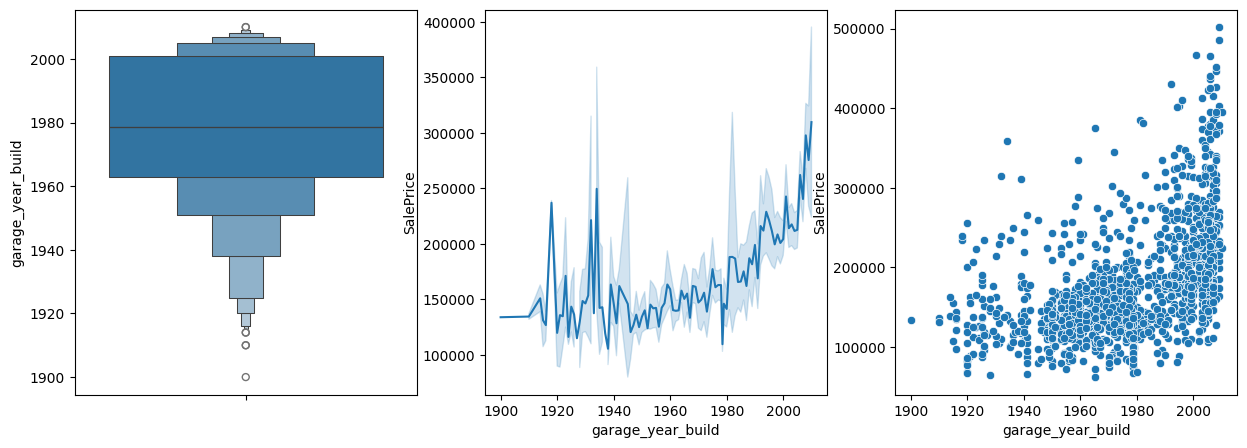

In [12]:
fig, axe = plt.subplots(1, 3, figsize=(15, 5))

sns.boxenplot(numerical_features["garage_year_build"], ax=axe[0])
sns.lineplot(
    x=numerical_features["garage_year_build"],
    y=numerical_features["SalePrice"],
    ax=axe[1],
)
sns.scatterplot(
    x=numerical_features["garage_year_build"],
    y=numerical_features["SalePrice"],
    ax=axe[2],
)

print(numerical_features["garage_year_build"].quantile(0.999))
print(numerical_features["garage_year_build"].quantile(0.0))

The dot on the far right is alone because it feels sad


In [13]:
Q1 = numerical_features["garage_year_build"].quantile(0.00)
Q2 = numerical_features["garage_year_build"].quantile(0.999)

df = clean.remove_outliers_quantile(Q1, Q2, "garage_year_build", numerical_features)
numerical_features = df

2


<h3 name='libraries'>   
      <font color = purple >
            <span style='font-family:Georgia'>
            1.5 basement_area:
            </span>   
        </font>    
</h3>


2120.67
0.0


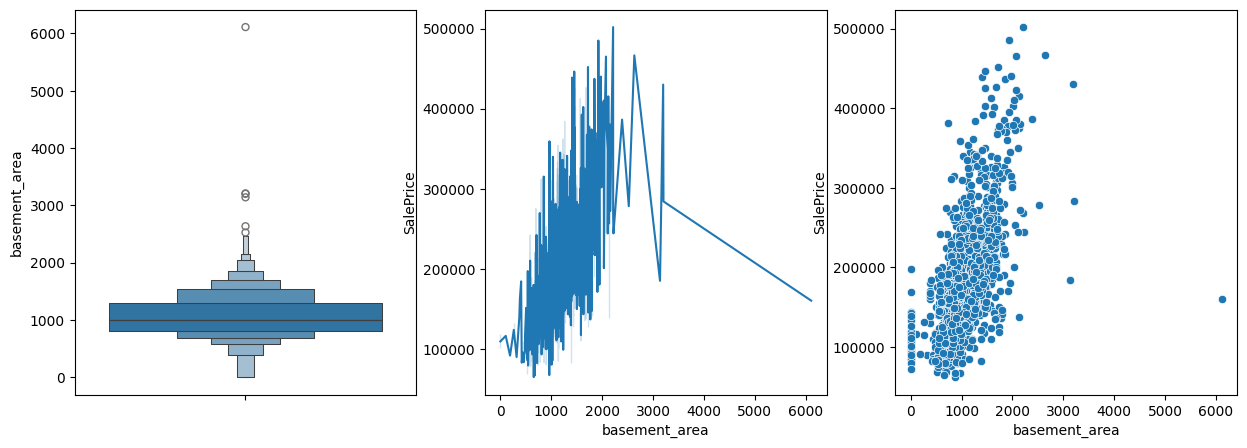

In [14]:
fig, axe = plt.subplots(1, 3, figsize=(15, 5))

sns.boxenplot(numerical_features["basement_area"], ax=axe[0])
sns.lineplot(
    x=numerical_features["basement_area"], y=numerical_features["SalePrice"], ax=axe[1]
)
sns.scatterplot(
    x=numerical_features["basement_area"], y=numerical_features["SalePrice"], ax=axe[2]
)

print(numerical_features["basement_area"].quantile(0.99))

print(numerical_features["basement_area"].quantile(0.01))

In [15]:
Q1 = numerical_features["basement_area"].quantile(0.026)
Q2 = numerical_features["basement_area"].quantile(0.99)
df = clean.remove_outliers_quantile(Q1, Q2, "basement_area", numerical_features)

51


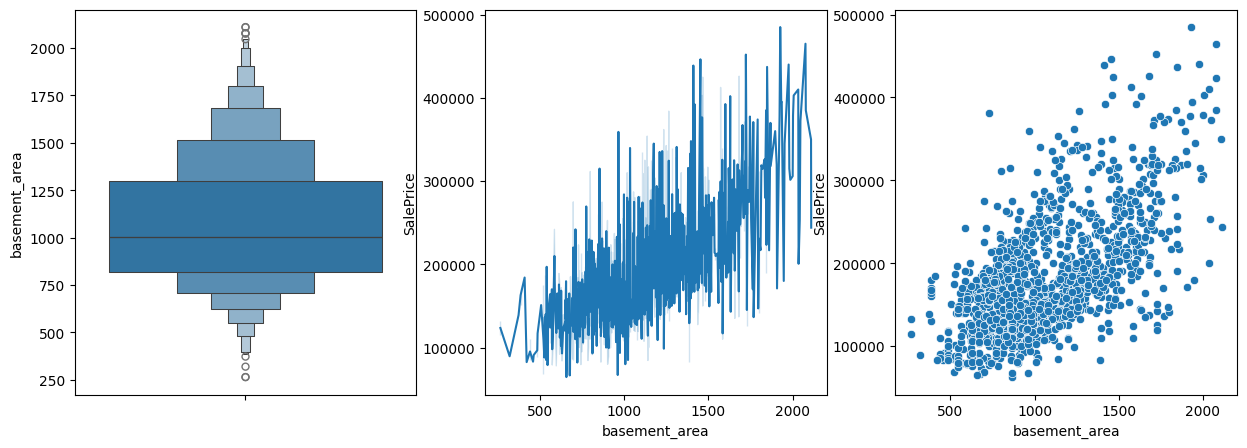

In [16]:
fig, axe = plt.subplots(1, 3, figsize=(15, 5))

sns.boxenplot(df["basement_area"], ax=axe[0])
sns.lineplot(x=df["basement_area"], y=df["SalePrice"], ax=axe[1])
sns.scatterplot(x=df["basement_area"], y=df["SalePrice"], ax=axe[2])

numerical_features = df

<h3 name='libraries'>   
      <font color = purple >
            <span style='font-family:Georgia'>
            1.6 grade_living_area:
            </span>   
        </font>    
</h3>


2653.6800000000003
625.856


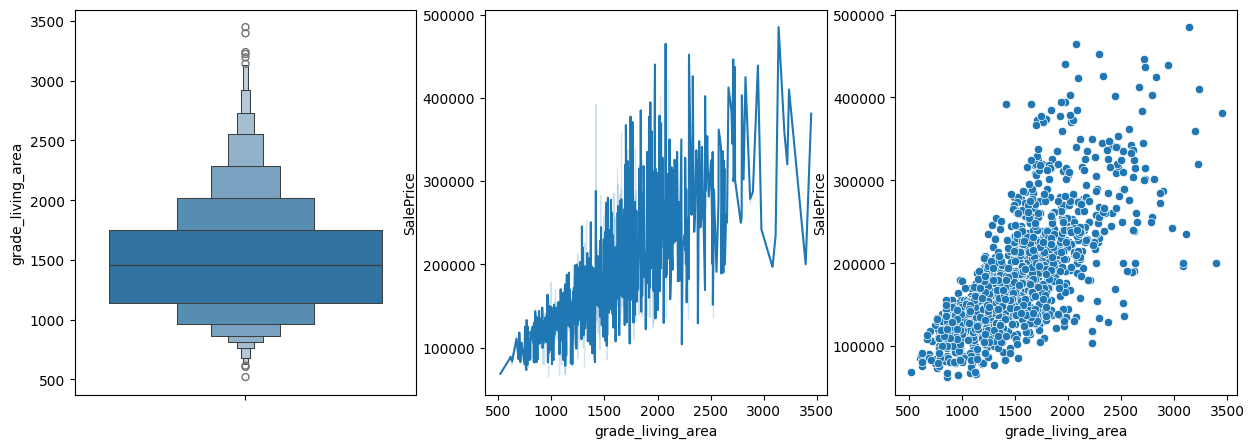

In [17]:
fig, axe = plt.subplots(1, 3, figsize=(15, 5))

sns.boxenplot(numerical_features["grade_living_area"], ax=axe[0])
sns.lineplot(
    x=numerical_features["grade_living_area"],
    y=numerical_features["SalePrice"],
    ax=axe[1],
)
sns.scatterplot(
    x=numerical_features["grade_living_area"],
    y=numerical_features["SalePrice"],
    ax=axe[2],
)

print(numerical_features["grade_living_area"].quantile(0.98))

print(numerical_features["grade_living_area"].quantile(0.002))

In [18]:
Q1 = numerical_features["grade_living_area"].quantile(0.002)
Q2 = numerical_features["grade_living_area"].quantile(0.98)
df = clean.remove_outliers_quantile(Q1, Q2, "grade_living_area", numerical_features)

31


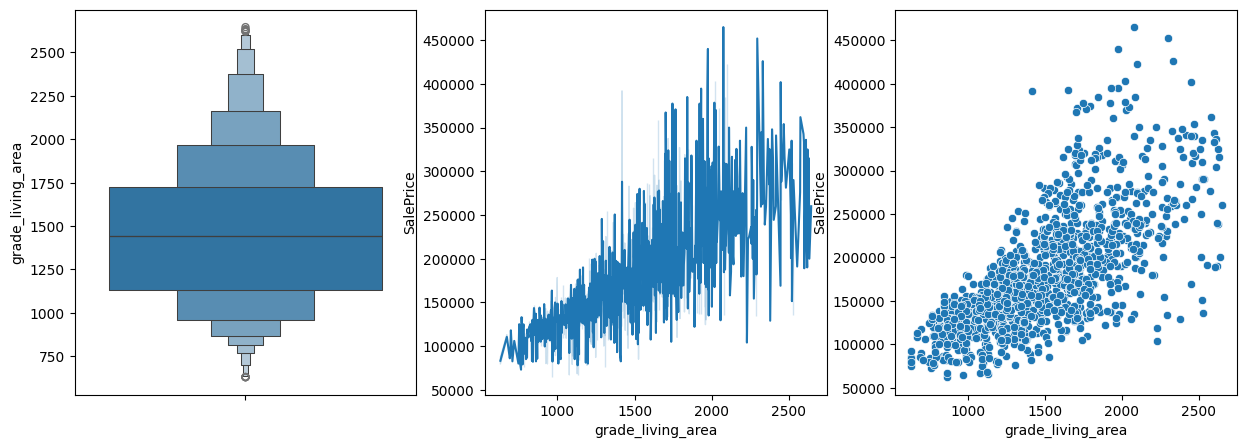

In [19]:
fig, axe = plt.subplots(1, 3, figsize=(15, 5))

sns.boxenplot(df["grade_living_area"], ax=axe[0])
sns.lineplot(x=df["grade_living_area"], y=df["SalePrice"], ax=axe[1])
sns.scatterplot(x=df["grade_living_area"], y=df["SalePrice"], ax=axe[2])
numerical_features = df

In [20]:
numerical_features

,house_area,quality,year_built,year_remodel_add,garage_year_build,number_of_bathrooms,basement_area,has_Fireplaces_or_not,TotRmsAbvGrd,grade_living_area,garage_area,garage_capacite,SalePrice
0,8450,7,2003,2003,2003.0,2,856,0,8,1710,548,2,208500
1,9600,6,1976,1976,1976.0,2,1262,1,6,1262,460,2,181500
2,11250,7,2001,2002,2001.0,2,920,1,6,1786,608,2,223500
3,9550,7,1915,1970,1998.0,1,756,1,7,1717,642,3,140000
4,14260,8,2000,2000,2000.0,2,1145,1,9,2198,836,3,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,1999,2000,1999.0,2,953,1,7,1647,460,2,175000
1456,13175,6,1978,1988,1978.0,2,1542,2,7,2073,500,2,210000
1457,9042,7,1941,2006,1941.0,2,1152,2,9,2340,252,1,266500
1458,9717,5,1950,1996,1950.0,1,1078,0,5,1078,240,1,142125


In [21]:
for col in test.columns:
    test[col] = test[col].astype({col: "int32"})
for col in numerical_features.columns:
    numerical_features[col] = numerical_features[col].astype({col: "int32"})

In [22]:
test.to_csv(
    r"/home/ahmed/Ai/Data science and Ml projects/House-Prices-Prediction---Data-Science-Ml-project/final_cleaned_datasets/test.csv"
)
numerical_features.to_csv(
    r"/home/ahmed/Ai/Data science and Ml projects/House-Prices-Prediction---Data-Science-Ml-project/final_cleaned_datasets/train.csv"
)

In [23]:
test

,house_area,quality,year_built,year_remodel_add,garage_year_build,number_of_bathrooms,basement_area,has_Fireplaces_or_not,TotRmsAbvGrd,grade_living_area,garage_area,garage_capacite,SalePrice
0,11622,5,1961,1961,1961,1,882,0,5,896,730,1,169277
1,14267,6,1958,1958,1958,1,1329,0,6,1329,312,1,187758
2,13830,5,1997,1998,1997,2,928,1,6,1629,482,2,183583
3,9978,6,1998,1998,1998,2,926,1,7,1604,470,2,179317
4,5005,8,1992,1992,1992,2,1280,0,5,1280,506,2,150730
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,1936,4,1970,1970,1977,1,546,0,5,1092,0,0,167081
1455,1894,4,1970,1970,1970,1,546,0,6,1092,286,1,164788
1456,20000,5,1960,1996,1960,1,1224,1,7,1224,576,2,219222
1457,10441,5,1992,1992,1977,1,912,0,6,970,0,0,184924


In [24]:
numerical_features

,house_area,quality,year_built,year_remodel_add,garage_year_build,number_of_bathrooms,basement_area,has_Fireplaces_or_not,TotRmsAbvGrd,grade_living_area,garage_area,garage_capacite,SalePrice
0,8450,7,2003,2003,2003,2,856,0,8,1710,548,2,208500
1,9600,6,1976,1976,1976,2,1262,1,6,1262,460,2,181500
2,11250,7,2001,2002,2001,2,920,1,6,1786,608,2,223500
3,9550,7,1915,1970,1998,1,756,1,7,1717,642,3,140000
4,14260,8,2000,2000,2000,2,1145,1,9,2198,836,3,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,1999,2000,1999,2,953,1,7,1647,460,2,175000
1456,13175,6,1978,1988,1978,2,1542,2,7,2073,500,2,210000
1457,9042,7,1941,2006,1941,2,1152,2,9,2340,252,1,266500
1458,9717,5,1950,1996,1950,1,1078,0,5,1078,240,1,142125
